In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Лабораторная работа №1. 
## Поиск мостов в графе.

Задача:    
Пусть дан неориентированный граф G = (V, E), где V - множество его вершин, E - множество его ребер. Мостом (2-мостом) называется такое ребро (пара ребер), удаление которого увеличивает число компонент связности графа на одну. Требуется найти все мосты и 2-мосты в заданном графе.

### Детерминированный алгоритм   
В основе данного алгоритма лежит обход графа в глубину и запоминание времени посещения вершин. Данный алгоритм находит только мосты в графе и работает за время О(V+E). 

### Рандомизированный алгоритм    
Применяя этот алгоритм, мы находим остовное дерево графа и присваимаем недревесным ребрам случайные веса из множества {0,1}. Затем, с помощью логической операции XOR, мы присваем древесным ребрам веса. Ребра, вес которых после присваивания равен 0, являются мостами. Ребра с одинаковыми весами (кроме 0) являются 2-мостами. Вероятность правильного определения веса для ребра при одном проходе алгоритма равна 1/2. Поэтому необходимо больше проход, чтобы повысить точность. Для этого используются различные типы данных (8, 16, 32, 64 ... битные) в одном проходе, что эквивалетно многоразовому повторению алгоритма.  
    
Данный алгоритм осуществляется за один проход графа в глубину и сортировку весов, то есть время его работы О(V+E) + время работы сортировки. 

Чтобы сравнить точность алгоритма, мы берем 8, 16, 32, 64 - битные типы данных.   
Чтобы сравнить скорость работы, мы берем Radix-сортировку, Bucket-сортировку и Std::Sort (Quick-сортировка). 

### Stress testing 

Сейчас будет тяжко. Рандомизированный алгоритм задает случайные веса только недревесным ребрам. В блоке, где все ребра - истиные попарные 2-мосты, только одно ребро недревесное, соответственно от него задаются веса (такие же) всем остальным ребрам в этом блоке. Вот у нас после сортировки есть блок с одинаковыми весами. Но мы пока не знаем: все ли ребра в нем - попарные 2-мосты, есть ли ребра-изгои (ни с одним другим не будут 2-мостом) или там вообще есть несколько блоков ребер с истиными попарными 2-мостами (т.е. например {е1,е2,е3} - 2-мосты между собой, {е4,е5} - 2-мосты между собой, все эти ребра имеют одинаковые веса, но (е1,е4) например не 2-мост). Такое тоже может быть. Получается, чтобы посчитать количество неправильно определенных ребер, нам необходимо посчитать, сколько в блоке с одинаковыми весами различных блоков с 2-мостами и ребер-изгоев. Это количество минус 1 будет количеством неправильно определенных ребер (мы считаем что одно было первоначально задано нормально, а остальные уже неправильные, так как совпадают). Вероятность выпадения такого же веса на другом недревесном ребре = 0.5^кол-во_бит (теоретическая вероятность). Поделим кол-во неправильных ребер на кол-во всех недревесных ребер и сравним с нашей теоретической вероятностью.

### Эксперименты и сравнение работы алгоритмов

In [140]:
data8 = pd.read_csv("./data/Out_8b.csv")
print(data8.shape)
data8

(80, 7)


,NumVert,NumEdges,DFS,Rand,Rand_Radix,Rand_Bucket,Rand_Sort
0,0,0,5.000000e+06,1.000000e+06,3.000000e+06,3.000000e+06,4.000000e+06
1,500,250,1.050000e+08,6.200000e+07,1.400000e+08,1.900000e+08,1.190000e+08
2,1000,500,1.960000e+08,1.170000e+08,2.630000e+08,3.230000e+08,2.270000e+08
3,1500,750,3.100000e+08,1.350000e+08,3.240000e+08,4.000000e+08,2.810000e+08
4,2000,1000,3.760000e+08,2.030000e+08,4.750000e+08,6.200000e+08,4.210000e+08
...,...,...,...,...,...,...,...
75,7500,14062500,1.982870e+12,3.404000e+12,7.786110e+12,1.105480e+13,8.695920e+12
76,8000,16000000,2.201290e+12,3.867920e+12,8.803930e+12,1.251370e+13,9.862920e+12
77,8500,18062500,2.514800e+12,4.324890e+12,9.612130e+12,1.399210e+13,1.084820e+13
78,9000,20250000,2.759470e+12,4.761230e+12,1.083000e+13,1.571370e+13,1.217920e+13


In [102]:
def draw_plot(data, i, j):
    pl1 = plt.plot(data['NumVert'][i:j], data['DFS'][i:j], label='DFS')
    plt.plot(data['NumVert'][i:j], data['Rand'][i:j], label='RAND')
    plt.plot(data['NumVert'][i:j], data['Rand_Radix'][i:j], label='RAND_RADIX')
    plt.plot(data['NumVert'][i:j], data['Rand_Bucket'][i:j], label='RAND_BUCKET')
    plt.plot(data['NumVert'][i:j], data['Rand_Sort'][i:j], label='RAND_SORT')
    plt.grid()
    plt.xlabel('NumVert')
    plt.ylabel('Time')
    plt.legend(('DFS', 'Rand', 'Radix', 'Bucket', 'Sort'))
#     plt.ylim(0, 1)
    plt.show()
    # plt.scatter(data['NumVert'], data['DFS'])
    # plt.scatter(data['NumVert'], data['Rand'])
   

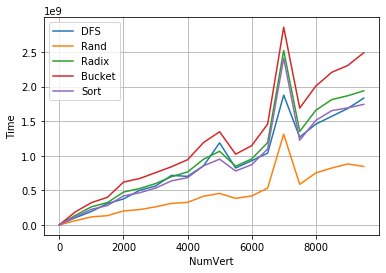

In [124]:
indexes = data8.loc[data8['NumVert'] == data8['NumVert'][0]].index
draw_plot(data8, indexes[0],indexes[1])
# plt.legend(handles=[dfs, rand])

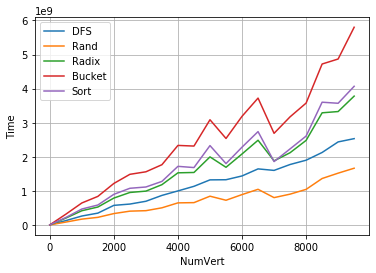

In [125]:
draw_plot(data8, indexes[1],indexes[2])

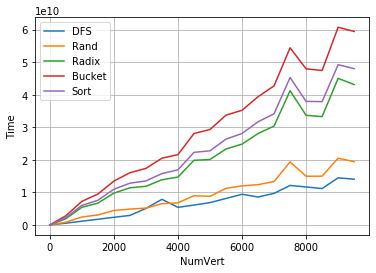

In [126]:
draw_plot(data8, indexes[2],indexes[3])

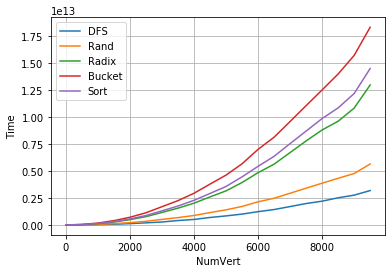

In [141]:
draw_plot(data8, indexes[3], data8.shape[0])

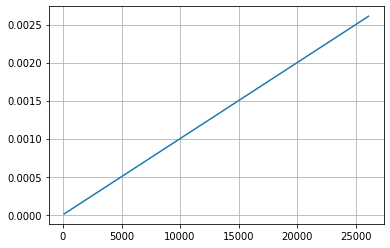

In [92]:
plt.plot(data['NumVert'], 0.0000001 * data['NumVert'])
plt.grid()
# plt.ylim(0, 2500)


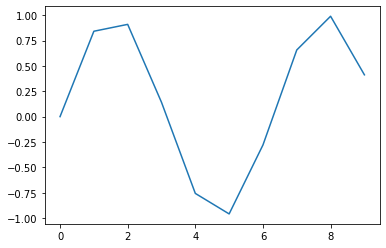

In [4]:
x = range(10)
y = np.sin(x)
plt.plot(x, y)

### Real-life графы

http://users.diag.uniroma1.it/challenge9/download.shtml

In [12]:
f = open('USA-road-d.NY.gr')
s = f.read()
s = s.split('\na ')
del s[0]
for i in range(len(s)):
    s[i] = s[i].split(' ')   
s

[['1', '2', '803'],
 ['2', '1', '803'],
 ['3', '4', '158'],
 ['4', '3', '158'],
 ['5', '6', '774'],
 ['6', '5', '774'],
 ['7', '8', '1531'],
 ['8', '7', '1531'],
 ['9', '10', '1673'],
 ['10', '9', '1673'],
 ['9', '11', '1400'],
 ['11', '9', '1400'],
 ['1', '12', '842'],
 ['12', '1', '842'],
 ['2', '13', '591'],
 ['13', '2', '591'],
 ['14', '15', '1371'],
 ['15', '14', '1371'],
 ['16', '17', '1659'],
 ['17', '16', '1659'],
 ['18', '19', '1012'],
 ['19', '18', '1012'],
 ['20', '21', '1226'],
 ['21', '20', '1226'],
 ['20', '22', '1265'],
 ['22', '20', '1265'],
 ['23', '24', '2707'],
 ['24', '23', '2707'],
 ['25', '26', '520'],
 ['26', '25', '520'],
 ['27', '28', '783'],
 ['28', '27', '783'],
 ['29', '30', '518'],
 ['30', '29', '518'],
 ['31', '32', '3412'],
 ['32', '31', '3412'],
 ['33', '34', '1994'],
 ['34', '33', '1994'],
 ['33', '35', '337'],
 ['35', '33', '337'],
 ['36', '37', '363'],
 ['37', '36', '363'],
 ['38', '39', '1018'],
 ['39', '38', '1018'],
 ['40', '41', '392'],
 ['41', '4

In [19]:
import csv
with open('NYgraph.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for i in range(0, len(s)):
        writer.writerow([s[i][0], s[i][1]])


https://www.cs.utah.edu/~lifeifei/SpatialDataset.htm

In [33]:
fil = open('california.txt')
clf = fil.read()
clf = clf.split('\n')
for i in range(len(clf)):
    clf[i] = clf[i].split(' ')   
clf

[['0', '0', '1', '0.002025'],
 ['1', '0', '6', '0.005952'],
 ['2', '1', '2', '0.014350'],
 ['3', '2', '3', '0.012279'],
 ['4', '3', '4', '0.011099'],
 ['5', '5', '6', '0.006157'],
 ['6', '5', '7', '0.001408'],
 ['7', '5', '8', '0.012008'],
 ['8', '7', '265', '0.003213'],
 ['9', '8', '298', '0.005382'],
 ['10', '9', '10', '0.012940'],
 ['11', '9', '36', '0.018695'],
 ['12', '9', '37', '0.002948'],
 ['13', '10', '11', '0.013238'],
 ['14', '11', '12', '0.028027'],
 ['15', '12', '13', '0.016322'],
 ['16', '13', '14', '0.032190'],
 ['17', '14', '15', '0.009105'],
 ['18', '15', '16', '0.012708'],
 ['19', '16', '17', '0.026648'],
 ['20', '17', '18', '0.009636'],
 ['21', '18', '19', '0.014209'],
 ['22', '19', '20', '0.008261'],
 ['23', '20', '21', '0.011507'],
 ['24', '21', '22', '0.008586'],
 ['25', '22', '23', '0.011969'],
 ['26', '23', '24', '0.011713'],
 ['27', '24', '25', '0.011671'],
 ['28', '25', '26', '0.007185'],
 ['29', '26', '27', '0.010523'],
 ['30', '27', '28', '0.004280'],
 ['31'

In [38]:
with open('California.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(clf)-1):
        writer.writerow([clf[i][1], clf[i][2]])

In [43]:
max = 0
for i in range(len(clf)-1):
    if (int(clf[i][1]) > max):
        max = int(clf[i][1])
    if (int(clf[i][2]) > max):
        max = int(clf[i][1])   
max

21045